# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 8/24/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 8/24/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1647,38928341,4.2
Albania,6320,2877800,219.6
Algeria,9279,43851043,21.2
Andorra,130,77265,168.3
Angola,2450,32866268,7.5
Antigua and Barbuda,192,97928,196.1
Argentina,106598,45195777,235.9
Armenia,5812,2963234,196.1
Australia,9348,25459700,36.7


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Summer Olympics 2020,189,0,inf
Georgia,67176,3989175,1684.0
Dominica,927,71991,1287.7
Kosovo,21521,1810366,1188.8
Israel,100654,8655541,1162.9
Cuba,127421,11326616,1125.0
Montenegro,6774,628062,1078.6
Malaysia,293835,32365998,907.9
Seychelles,880,98340,894.9


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

8/20/21    3863495.0
8/21/21    3870095.0
8/22/21    3876041.0
8/23/21    3881633.0
8/24/21    3898287.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

8/11/21        NaN
8/12/21     5497.0
8/13/21     5536.0
8/14/21     4675.0
8/15/21     3732.0
8/16/21     3549.0
8/17/21     5391.0
8/18/21     9008.0
8/19/21     8303.0
8/20/21     8966.0
8/21/21     6600.0
8/22/21     5946.0
8/23/21     5592.0
8/24/21    16654.0
Name: Germany, dtype: float64

<AxesSubplot:>

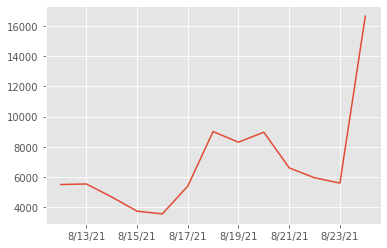

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

106.76150424762166